In [66]:
import pandas as pd
import numpy as np

In [67]:
raw_data = np.genfromtxt('./data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

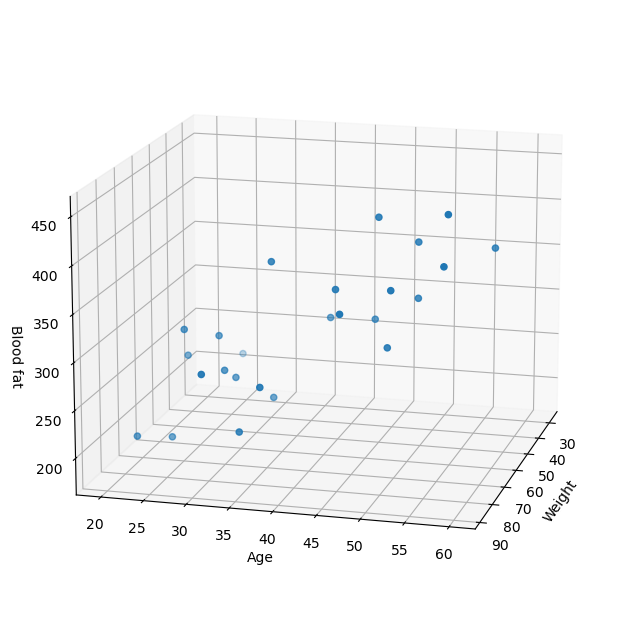

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

- 선형회귀로 W와 b 구하기(y = XW + b)
- shape : X = 25 * 2, W = 2 * 1, b = 25 * 1
- XW = 25 * 1
- ![](2024-01-29-16-54-00.png)

In [69]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

In [70]:
x_data.shape

(25, 2)

In [71]:
y_data.shape

(25,)

In [72]:
# WX가 25 * 1의 구조이므로 y_data의 구조고 바꿔주어야 한다
y_data = y_data.reshape((25, 1))

### 모델 생성
![](2024-01-29-16-54-26.png)
![](2024-01-29-16-54-45.png)

In [73]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1 ,input_shape=(2, ))
])

model.compile(optimizer='rmsprop', loss='mse')

In [74]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


![](2024-01-29-16-56-47.png)

### 딥러닝 파라미터
- Batch_size : Batch 크기는 몇 개의 문제를 한 번에 쭉 풀고 채점할지를 결정하는 것
- epoch : Epoch는 '에포크'라고 읽고 전체 데이터셋을 학습한 횟수
- https://heytech.tistory.com/386 참고

In [75]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 144ms/step - loss: 116559.3281
Epoch 2/5000
1/1 [==============================] - 0s 16ms/step - loss: 116323.5625
Epoch 3/5000
1/1 [==============================] - 0s 5ms/step - loss: 116152.7578
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 116009.8672
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 115883.1406
Epoch 6/5000
1/1 [==============================] - 0s 0s/step - loss: 115767.0938
Epoch 7/5000
1/1 [==============================] - 0s 11ms/step - loss: 115658.6562
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 115555.9766
Epoch 9/5000
1/1 [==============================] - 0s 10ms/step - loss: 115457.7422
Epoch 10/5000
1/1 [==============================] - 0s 0s/step - loss: 115363.0703
Epoch 11/5000
1/1 [==============================] - 0s 0s/step - loss: 115271.3125
Epoch 12/5000
1/1 [==============================] - 0s 15ms/step - loss

### loss 확인

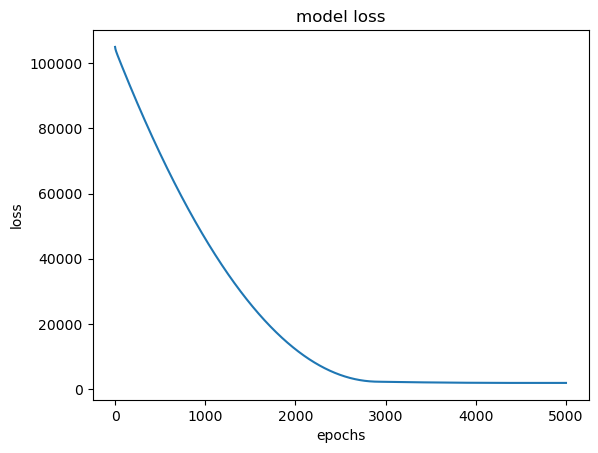

In [15]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

### predict

In [17]:
model.predict(np.array([100, 44]).reshape(1, 2))

1/1 [==============================] - 0s 33ms/step


array([[375.02106]], dtype=float32)

In [18]:
model.predict(np.array([60, 25]).reshape(1, 2))

1/1 [==============================] - 0s 13ms/step


array([[219.19777]], dtype=float32)

In [20]:
W_, b_ = model.get_weights()
print('Weight :', W_)
print('bias :', b_)

Weight : [[1.2492466]
 [5.5712314]]
bias : [4.962211]


### 모델이 잘 만들어졌는지 확인하기 위해 데이터를 만들고 시각화

In [21]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

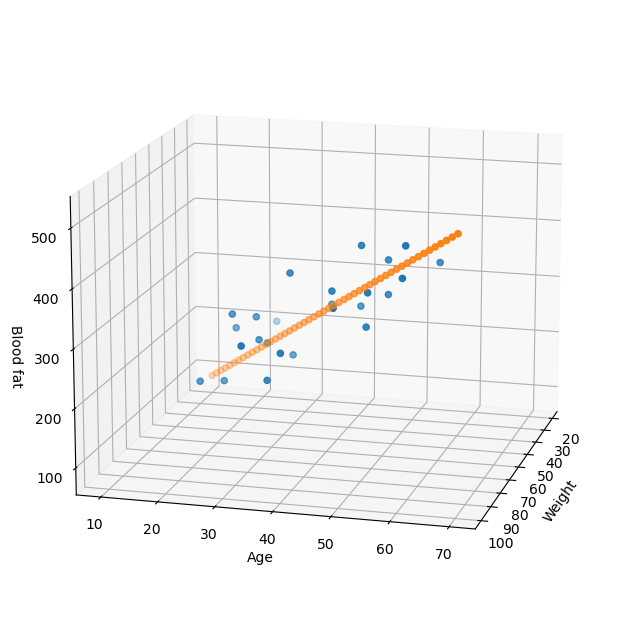

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

### XOR

In [24]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
])

y = np.array([[0], [1], [1], [0]])

### activation
- layer 하나당 직선이 하나 존재하며 2개의 layer들의 직선이 더해지면 결국 하나의 직선 결과를 얻게 된다
- 이렇게 만들어진 하나의 직선함수로는 XOR 문제를 해결할 수 없고 layer를 나누는 의미도 없어진다 
- 이를 극복하고자 activation 함수 설정을 통하여 비선형 함수로 바꾸어주고 최종적으로 XOR 문제를 해결할 비선형 함수를 도출해 내야된다 

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2, )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

![](2024-01-29-17-28-56.png)

### model.compile
- SDG : 가장 기본적인 최적화 알고리즘으로, 미분 가능한 함수에서 기울기(gradient)를 계산하여 가중치를 업데이트합니다. 
- 일반적으로 학습률(learning rate)과 모멘텀(momentum) 파라미터를 설정하여 사용
- https://wikidocs.net/192936 참고

In [29]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

### 모델 summary

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [32]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 2/5000
4/4 [==============================] - 0s 350us/step - loss: 0.2703
Epoch 3/5000
4/4 [==============================] - 0s 425us/step - loss: 0.2684
Epoch 4/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2666
Epoch 5/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2649
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 7/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 8/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2612
Epoch 9/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2601
Epoch 10/5000
4/4 [==============================] - 0s 368us/step - loss: 0.2594
Epoch 11/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2588
Epoch 12/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 13/5000
4/4 [=========================

### 모델 예측

In [33]:
model.predict(X)

1/1 [==============================] - 0s 66ms/step


array([[0.05704156],
       [0.9476861 ],
       [0.9478058 ],
       [0.05614946]], dtype=float32)

### Loss 확인

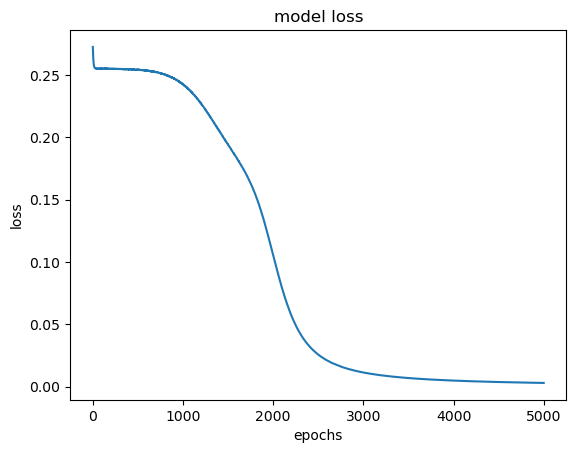

In [34]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

### iris 분류모델

In [105]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [106]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### One hot encoding
![](2024-02-14-18-02-05.png)
- 분류의 경우 에러 값(=강도)들이 달라지게 되어 학습이 편향되는 경우가 발생할 수 있다
- ex) 예측 : 0, 실제값 : 0, 에러 : 0 but 예측 : 0, 실제값 : 1, 에러 : 1, 예측 : 0, 실제값 : 2, 에러 : 2
- 예시처럼 에러의 값(=강도)들이 크기에 의해 달라지는 경우 경우 결과가 달라질 수 있다
- 이를 극복하고자 위 그림처럼 OneHotEncoding를 통해 벡터로 변환하여 각각의 거리를 에러로 만들고 그에 따른 크기 차이는 없어진다

In [107]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#sparse = sparse_output
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [108]:
enc.categories_

[array([0, 1, 2])]

In [109]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    random_state=13)

### 모델 구성

In [111]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

![](2024-01-29-18-13-51.png)

### 역전파(back-propagation) 사용
- 레이어가 많을 수록 에러(=오차)를 계산하기 위한 연산량과 메모리가 많이 소모되어 힘들기 때문에 역전파(back-propagation) 사용
- 역전파는 최종으로 나온 에러(=오차)를 미분하여 역으로 전 단계로 전달하는 것

### 역전파에서 sigmoid는 소실될 수 있는 문제가 있어 ReLu를 사용
![](2024-01-29-18-32-41.png)
![](2024-01-29-18-33-03.png)
![](2024-01-29-18-33-18.png)
![](2024-01-29-18-33-39.png)

### gradient decent
![](2024-01-29-18-40-06.png)
![](2024-01-29-18-40-30.png)

### SGD 
![](2024-01-29-18-41-54.png)
![](2024-01-29-18-42-06.png)
![](2024-01-29-18-42-25.png)
![](2024-01-29-18-42-53.png)

### 잘모르겠으면, 데이터가 복잡하다면 Adam을 써보자
- 현 시점에서 가장 좋은 optimizer는 adam이다

In [112]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                160       
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [113]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 0s/step - loss: 1.1335 - accuracy: 0.3083
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0497 - accuracy: 0.3250
Epoch 3/100
4/4 [==============================] - 0s 0s/step - loss: 0.9904 - accuracy: 0.3500
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.9512 - accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9106 - accuracy: 0.3750
Epoch 6/100
4/4 [==============================] - 0s 0s/step - loss: 0.8778 - accuracy: 0.7417
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8468 - accuracy: 0.8583
Epoch 8/100
4/4 [==============================] - 0s 0s/step - loss: 0.8163 - accuracy: 0.8583
Epoch 9/100
4/4 [==============================] - 0s 0s/step - loss: 0.7830 - accuracy: 0.8750
Epoch 10/100
4/4 [==============================] - 0s 0s/step - loss: 0.7468 - accuracy: 0.8500
Epoch 11/100
4/4 [===============

### test 데이터에 대한 accuracy

In [114]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0919 - accuracy: 0.9667 - 114ms/epoch - 114ms/step


[0.09190467745065689, 0.9666666388511658]

### loss와 acc의 변화

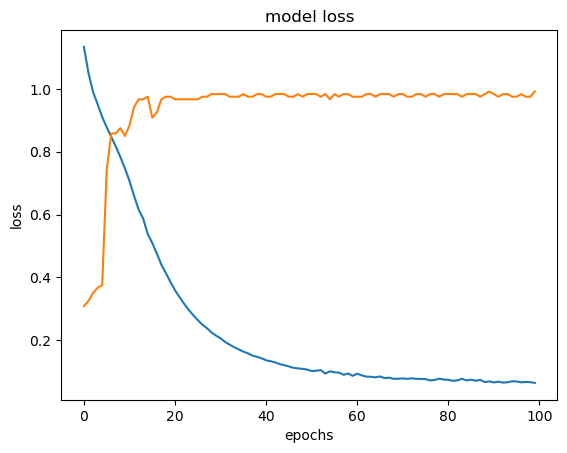

In [116]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()